In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sps

In [147]:
df_data = pd.read_csv("../Data/preprocessed_Oppervlakte_STD.csv")
df_data = df_data.drop("Unnamed: 0", axis=1)
# display(df_data)

In [148]:
chars = ["array([[2]], dtype=uint8", "array", "\n", "[", "]", "(", ")"]

def string_to_ndarray(sd):
    for char in chars:
        sd = sd.replace(char, "")

    sd = sd.replace("   ", " ")
    sd = sd[:-2]

    sd_lst = sd.split(" ")
    sd_lst = [float(i) for i in sd_lst]

    sd_arr = np.asarray(sd_lst)
    sd_arr = np.split(sd_arr, len(sd_arr)/3)
    
    return np.asarray(sd_arr)

#### Use first ID to check possibilities in finding peaks and distances

In [149]:
sd_norm = string_to_ndarray(df_data["SegmentData"][6])
sd_bril = string_to_ndarray(df_data["SegmentData"][366])

In [150]:
n_peaks, n_dict = sps.find_peaks(sd_norm[:,1], height=(None,0))
n_xs = [sd_norm[:,2][peak] for peak in n_peaks]
n_ys = list(n_dict.values())[0]

b_peaks, b_dict = sps.find_peaks(sd_bril[:,1], height=(None,0))
b_xs = [sd_bril[:,2][peak] for peak in b_peaks]
b_ys = list(b_dict.values())[0]

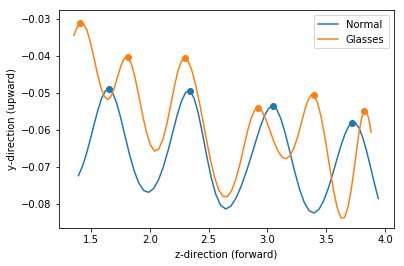

In [151]:
plt.plot(sd_norm[:,2], sd_norm[:,1], label="Normal")
plt.plot(sd_bril[:,2], sd_bril[:,1], label="Glasses")
plt.scatter(n_xs, n_ys)
plt.scatter(b_xs, b_ys)
plt.xlabel("z-direction (forward)")
plt.ylabel("y-direction (upward)")
plt.legend()
plt.show()

In [152]:
n_dis = np.mean(np.diff(n_xs))
b_dis = np.mean(np.diff(b_xs))
print(n_dis, b_dis)

0.6890988033333333 0.48253635799999994


#### For all

In [153]:
def distance(sd_arr):
    peaks, _ = sps.find_peaks(sd_arr[:,1], height=(None,0))
    xs = [sd_arr[:,2][peak] for peak in peaks]
    return np.absolute(np.mean(np.diff(xs)))


In [154]:
distances = []
for i in range(0, 720):
    sd = df_data["SegmentData"][i]
    sd_arr = string_to_ndarray(sd)
    dis = distance(sd_arr)
    distances.append(dis)
    
col = pd.Series(distances)
df_data["AverageStepLength"] = col.values

In [155]:
display(df_data)

,Unnamed: 0.1,TestID,Conditie,SubjectID,SegmentNr,WalkingDirection,SegmentData,Height,Weight,Age,BMI,std_SegmentData,Som_afstand,AverageStepLength
0,0,006A01',norm,6,1,away,[[array([[0.04697253]]) array([[-0.18321628]])...,177,70.0,20,22.343516,0.060870,3.409617,0.610128
1,1,006A01',norm,6,2,towards,[[array([[0.40771624]]) array([[-0.22044282]])...,177,70.0,20,22.343516,0.038465,1.934760,0.681944
2,2,006A01',norm,6,3,away,[[array([[0.09305737]]) array([[-0.19160482]])...,177,70.0,20,22.343516,0.030903,1.357366,0.713798
3,3,006A01',norm,6,4,towards,[[array([[0.44424376]]) array([[-0.2283845]]) ...,177,70.0,20,22.343516,0.074751,4.261516,0.651639
4,4,009A01',norm,9,1,away,[[array([[-0.08974021]]) array([[-0.0481508]])...,195,86.0,23,22.616700,0.028861,1.569590,0.768314
5,5,009A01',norm,9,2,towards,[[array([[0.47497733]]) array([[-0.09702823]])...,195,86.0,23,22.616700,0.029494,1.660196,0.685495
6,6,009A01',norm,9,3,away,[[array([[0.00489379]]) array([[-0.07232992]])...,195,86.0,23,22.616700,0.017266,1.055629,0.689099
7,7,009A01',norm,9,4,towards,[[array([[0.51498991]]) array([[-0.09675995]])...,195,86.0,23,22.616700,0.015360,0.931125,0.660362
8,8,010A01',norm,10,1,away,[[array([[-0.33516738]]) array([[-0.30029692]]...,165,65.0,28,23.875115,0.068683,4.492418,0.538055
9,9,010A01',norm,10,2,towards,[[array([[0.54318447]]) array([[-0.34777679]])...,165,65.0,28,23.875115,0.024063,1.929386,0.571604


In [ ]:
df_data.to_csv(path_or_buf="../Data/preprocessed_incl_std.csv")